In [1]:
import numpy as np
from numpy import linalg as LA
from ncon import ncon
import matplotlib.pyplot as plt

r_del = 3


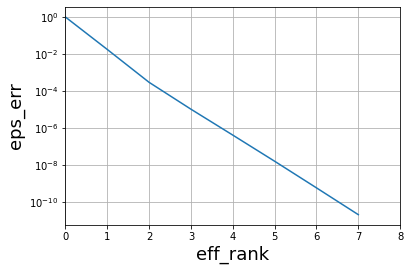

In [2]:
d1 = 10
d2 = 8
A = []
for i in range(d1):
    for j in range(d1):
        for l in range(d2):
            for k in range(d2):
                A.append(np.sqrt(i+2*j+3*k+4*l+10))
A = np.array(A)
A = A.reshape(d1,d1,d2,d2)
A = A / LA.norm(A)
U_1,S_1,V_1 = LA.svd(A.reshape(d1**2, d2**2), full_matrices=False)
U = U_1.reshape(d1,d1,d2**2)
V = V_1.reshape(d2**2,d2,d2)

eps = 1e-4
r_del = 0
while(S_1[r_del] > eps):
    r_del += 1    
epsilon = np.sqrt(sum(S_1[r_del:]**2))
print("r_del = " + str(r_del))

eps_AB = []
for i in range(d2):
    V_t = V[:i,:,:]
    S_t = np.diag(S_1[:i])
    U_t = U[:,:,:i]
    B = ncon([U_t, S_t, V_t], [[-1,-2,1],[1,2],[2,-3,-4]])
    eps_AB.append(LA.norm(A-B) / LA.norm(A))

x = [i for i in range(d2)]
plt.plot(x, eps_AB)
plt.ylabel("eps_err", fontsize=18)
plt.xlabel("eff_rank", fontsize=18)
plt.xlim([0,d2])
# plt.ylim([0,1])
plt.yscale('log')
plt.grid(True)
plt.show()